# Pos graduação - Ciência de Dados
## ANÁLISE COMPUTACIONAL E QUALITATIVA DE DADOS

#### David Machado Siqueira
#### Matrícula: 2018100153


In [1]:
import pandas as pd


In [2]:
# Caminho do arquivo CSV no Google Colab
caminho_arquivo = '/content/pesquisa.csv'

# Carregar os dados do CSV com o encoding 'latin-1'
dados = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')

In [3]:
dados.head()

,"TURMA,DISCIPLINA,PERÍODO,SEXO,PESQ1,PESQ2"
0,"T126,ALG-I,1P,1,0,"
1,"T126,ALG-I,1P,1,0,"
2,"T126,ALG-I,1P,1,P,P"
3,"T126,ALG-I,1P,1,0,"
4,"T126,ALG-I,1P,1,H,H"


In [4]:
# prompt: Usando o DataFrame dados: total por sexo

# Split the 'TURMA,DISCIPLINA,PERÍODO,SEXO,PESQ1,PESQ2' column into separate columns
dados[['TURMA', 'DISCIPLINA', 'PERÍODO', 'SEXO', 'PESQ1', 'PESQ2']] = dados['TURMA,DISCIPLINA,PER\u00cdODO,SEXO,PESQ1,PESQ2'].str.split(',', expand=True)

# Group by 'SEXO' and count the occurrences
total_por_sexo = dados.groupby('SEXO').size()

In [11]:
# prompt: numero total de votos no geral e por periodo

# Calculate the total number of votes overall
total_votos = dados.shape[0]
print("Total de votos no geral:", total_votos)

# Calculate the total number of votes by period
total_votos_por_periodo = dados.groupby('PERÍODO').size()
print("\nTotal de votos por período:")
print(total_votos_por_periodo)


Total de votos no geral: 457

Total de votos por período:
PERÍODO
1P     35
2P    123
3P    175
5P    124
dtype: int64


In [5]:
print(total_por_sexo)

SEXO
1    401
2     56
dtype: int64


In [13]:
# prompt: total de votos que estão como 0 na pesq1

# Filtrar os votos que são 0 na coluna 'PESQ1'
votos_pesq1_zero = dados[dados['PESQ1'] == '0']

# Contar o número de votos que são 0 na coluna 'PESQ1'
total_votos_pesq1_zero = votos_pesq1_zero.shape[0]

print("Total de votos que são 0 na PESQ1:", total_votos_pesq1_zero)


Total de votos que são 0 na PESQ1: 173


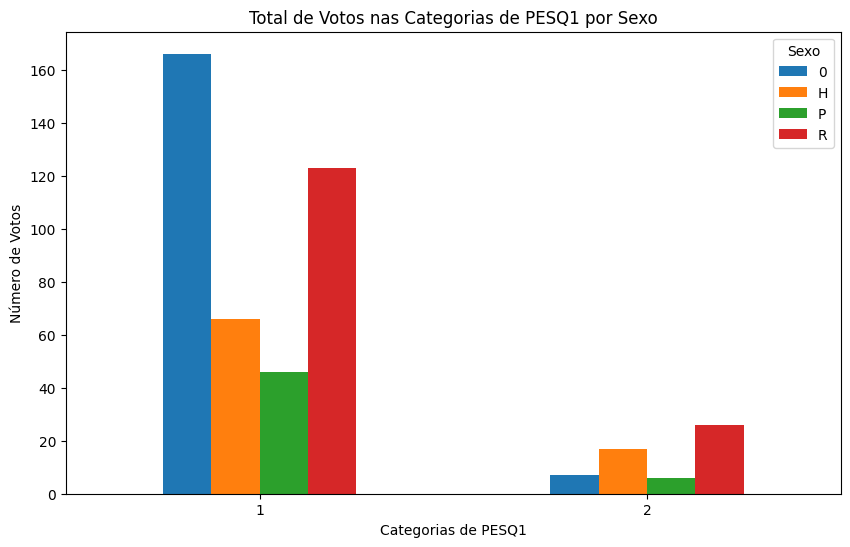

In [6]:
# prompt: Um grafico contendo o total de votos nas categorias de pesq1  entre o sexo 1 e 2

import matplotlib.pyplot as plt

# Agrupa os dados por 'SEXO' e 'PESQ1' e conta as ocorrências
contagem_votos = dados.groupby(['SEXO', 'PESQ1']).size().unstack(fill_value=0)

# Plota o gráfico de barras
contagem_votos.plot(kind='bar', figsize=(10, 6))
plt.title('Total de Votos nas Categorias de PESQ1 por Sexo')
plt.xlabel('Categorias de PESQ1')
plt.ylabel('Número de Votos')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.show()


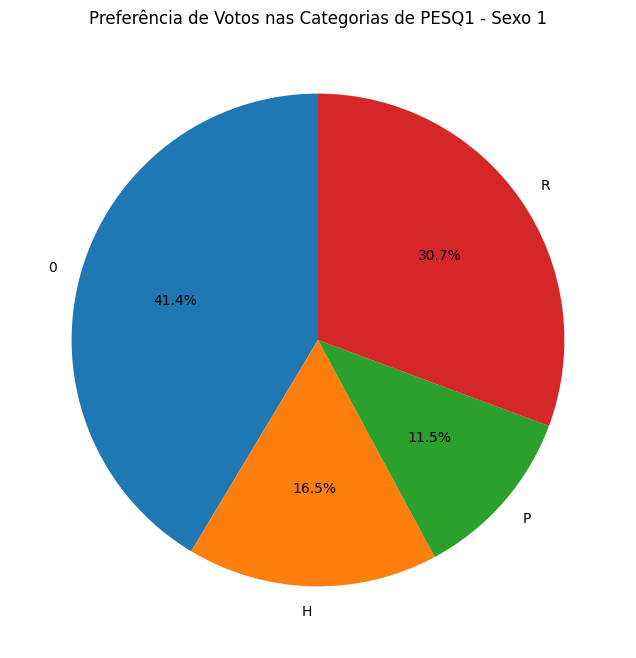

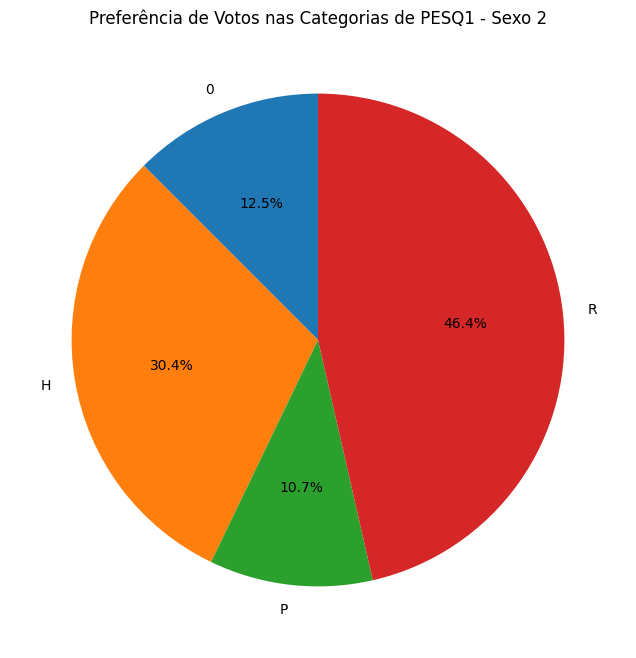

In [7]:
# prompt: Separe a preferencia de votos entre sexos  1 e 2 e plote em um grafico de rosca diferenciando por porcentagem

import matplotlib.pyplot as plt
# Filtra os dados para o sexo 1
dados_sexo1 = dados[dados['SEXO'] == '1']

# Agrupa os dados do sexo 1 por 'PESQ1' e conta as ocorrências
contagem_votos_sexo1 = dados_sexo1.groupby('PESQ1').size()

# Filtra os dados para o sexo 2
dados_sexo2 = dados[dados['SEXO'] == '2']

# Agrupa os dados do sexo 2 por 'PESQ1' e conta as ocorrências
contagem_votos_sexo2 = dados_sexo2.groupby('PESQ1').size()

# Plota o gráfico de rosca para o sexo 1
plt.figure(figsize=(8, 8))
plt.pie(contagem_votos_sexo1, labels=contagem_votos_sexo1.index, autopct='%1.1f%%', startangle=90)
plt.title('Preferência de Votos nas Categorias de PESQ1 - Sexo 1')
plt.show()

# Plota o gráfico de rosca para o sexo 2
plt.figure(figsize=(8, 8))
plt.pie(contagem_votos_sexo2, labels=contagem_votos_sexo2.index, autopct='%1.1f%%', startangle=90)
plt.title('Preferência de Votos nas Categorias de PESQ1 - Sexo 2')
plt.show()


In [8]:
# prompt: Mostre o total de votos por turno periodo

# Agrupa os dados por 'PERÍODO' e conta as ocorrências
total_por_periodo = dados.groupby('PERÍODO').size()
print(total_por_periodo)


PERÍODO
1P     35
2P    123
3P    175
5P    124
dtype: int64


In [9]:
# prompt: Total de votos do sexo 1 e sexo 2 separados

# Agrupa os dados por 'SEXO' e 'PESQ1' e conta as ocorrências
contagem_votos_por_sexo = dados.groupby(['SEXO', 'PESQ1']).size().unstack(fill_value=0)

# Calcula o total de votos para cada sexo
total_votos_sexo1 = contagem_votos_por_sexo.loc['1'].sum()
total_votos_sexo2 = contagem_votos_por_sexo.loc['2'].sum()

# Imprime os totais
print("Total de votos do sexo 1:", total_votos_sexo1)
print("Total de votos do sexo 2:", total_votos_sexo2)


Total de votos do sexo 1: 401
Total de votos do sexo 2: 56


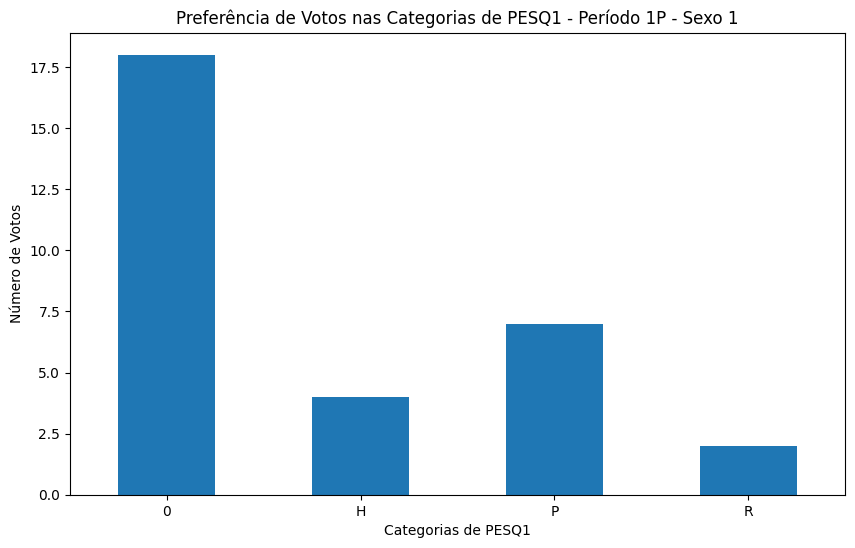

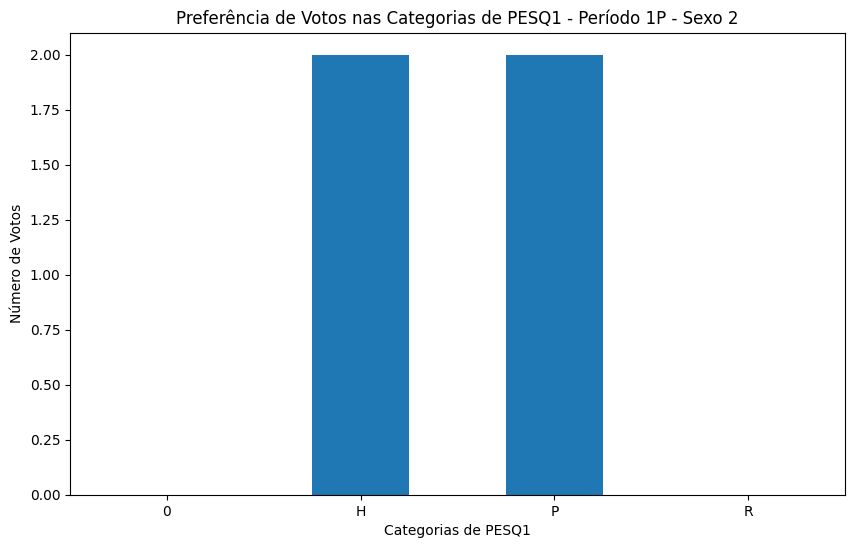

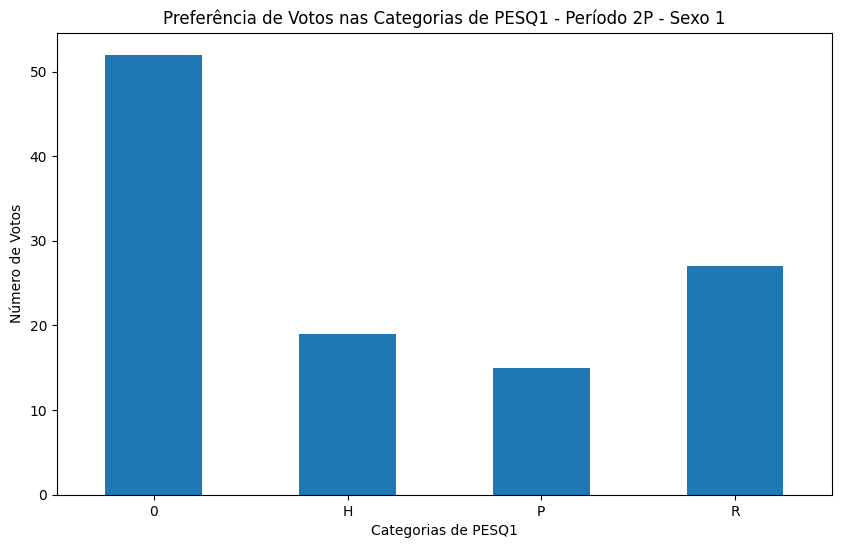

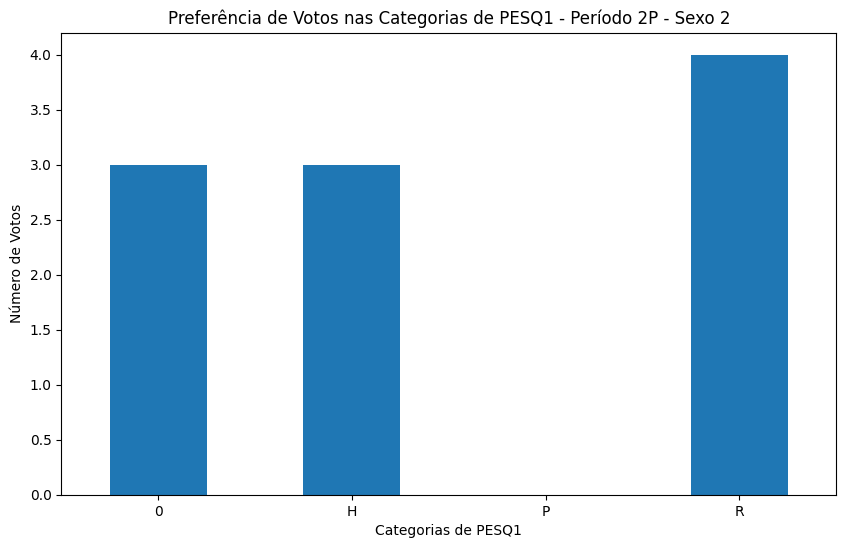

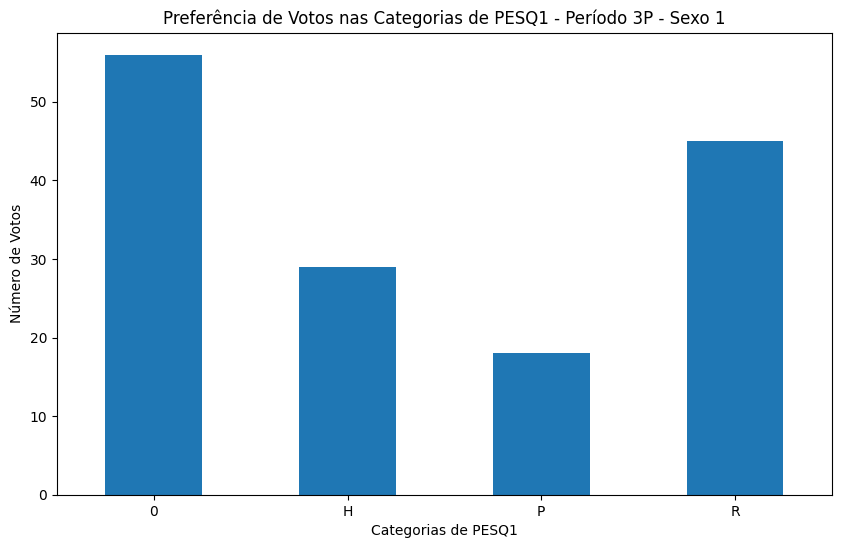

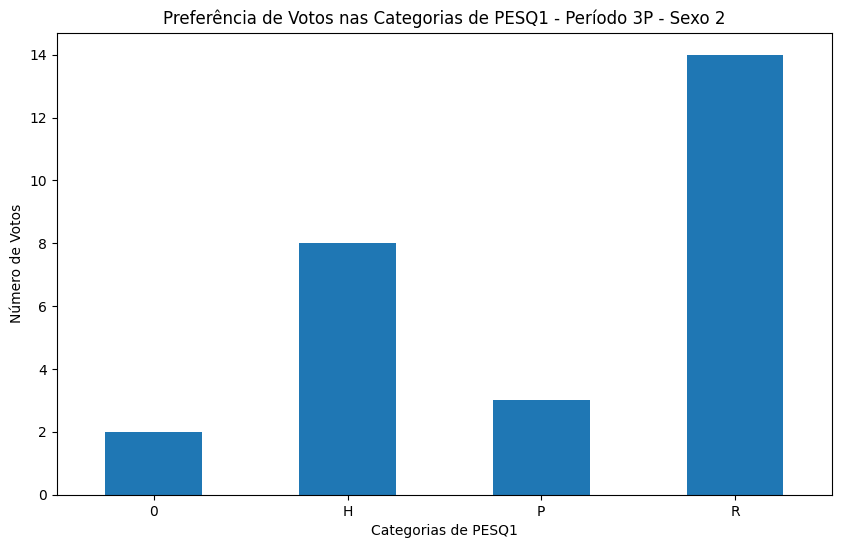

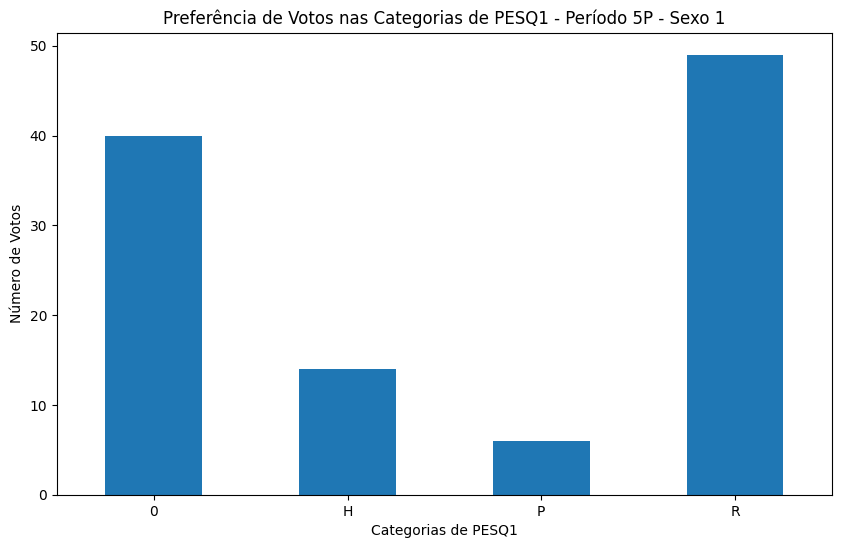

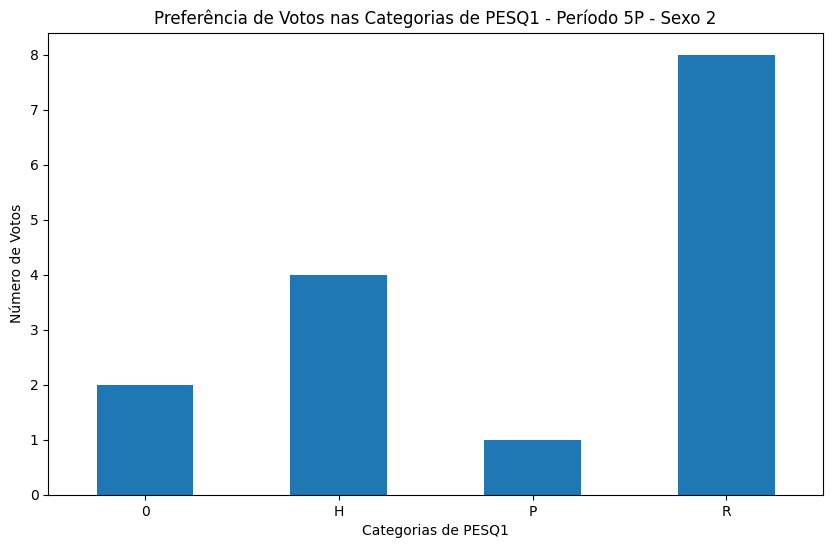

In [10]:
# prompt: Separe a preferencia de votos entre periodos e separe por sexo

import matplotlib.pyplot as plt
# Agrupa os dados por 'PERÍODO', 'SEXO' e 'PESQ1' e conta as ocorrências
contagem_votos_por_periodo_sexo = dados.groupby(['PERÍODO', 'SEXO', 'PESQ1']).size().unstack(fill_value=0)

# Itera sobre os períodos e plota os gráficos de barras para cada sexo
for periodo in contagem_votos_por_periodo_sexo.index.get_level_values('PERÍODO').unique():
    contagem_votos_periodo = contagem_votos_por_periodo_sexo.loc[periodo]

    # Plota o gráfico de barras para o sexo 1
    plt.figure(figsize=(10, 6))
    contagem_votos_periodo.loc['1'].plot(kind='bar')
    plt.title(f'Preferência de Votos nas Categorias de PESQ1 - Período {periodo} - Sexo 1')
    plt.xlabel('Categorias de PESQ1')
    plt.ylabel('Número de Votos')
    plt.xticks(rotation=0)
    plt.show()

    # Plota o gráfico de barras para o sexo 2
    plt.figure(figsize=(10, 6))
    contagem_votos_periodo.loc['2'].plot(kind='bar')
    plt.title(f'Preferência de Votos nas Categorias de PESQ1 - Período {periodo} - Sexo 2')
    plt.xlabel('Categorias de PESQ1')
    plt.ylabel('Número de Votos')
    plt.xticks(rotation=0)
    plt.show()


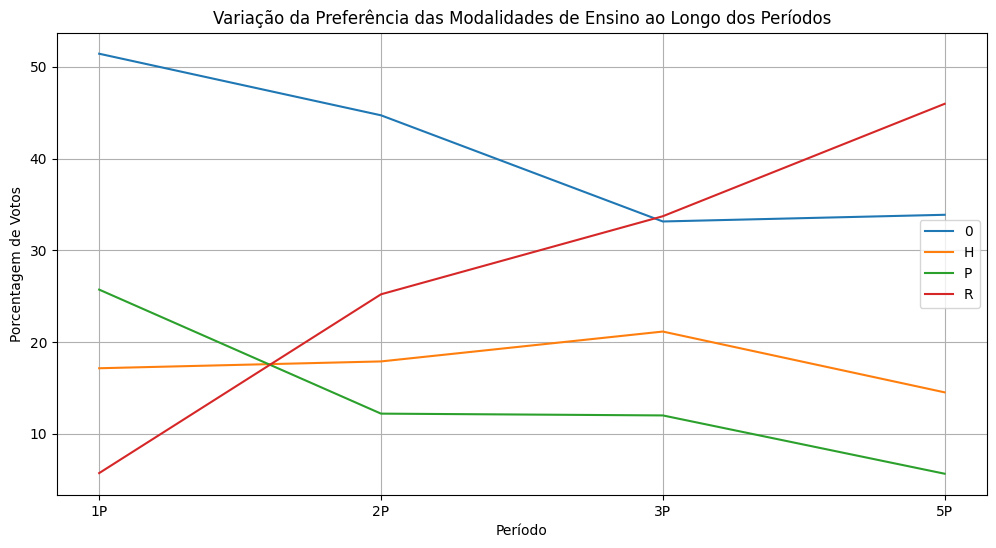

Valor do qui-quadrado: 33.28972986724632
Valor-p: 0.00011889367037071716
Há evidências estatísticas para sugerir que existe uma variação significativa na preferência das modalidades de ensino ao longo dos períodos.


In [17]:
# prompt: Analisar se há variações significativas na preferência das modalidades de ensino ao longo dos períodos específicos

import matplotlib.pyplot as plt
# Agrupa os dados por 'PERÍODO', 'PESQ1' e conta as ocorrências
contagem_votos_por_periodo_pesq1 = dados.groupby(['PERÍODO', 'PESQ1']).size().unstack(fill_value=0)

# Calcula as porcentagens de votos para cada modalidade em cada período
percentuais_por_periodo = contagem_votos_por_periodo_pesq1.div(contagem_votos_por_periodo_pesq1.sum(axis=1), axis=0) * 100

# Plota um gráfico de linhas para visualizar as variações
plt.figure(figsize=(12, 6))
for modalidade in percentuais_por_periodo.columns:
    plt.plot(percentuais_por_periodo.index, percentuais_por_periodo[modalidade], label=modalidade)
plt.title('Variação da Preferência das Modalidades de Ensino ao Longo dos Períodos')
plt.xlabel('Período')
plt.ylabel('Porcentagem de Votos')
plt.legend()
plt.grid(True)
plt.show()

# Realiza um teste estatístico para verificar se as variações são significativas
# (Exemplo: teste qui-quadrado)
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contagem_votos_por_periodo_pesq1)

print(f"Valor do qui-quadrado: {chi2}")
print(f"Valor-p: {p}")

if p < 0.05:
    print("Há evidências estatísticas para sugerir que existe uma variação significativa na preferência das modalidades de ensino ao longo dos períodos.")
else:
    print("Não há evidências estatísticas suficientes para sugerir uma variação significativa na preferência das modalidades de ensino ao longo dos períodos.")


In [20]:
# prompt: Investigar se as respostas às questões PESQ1 e PESQ2 mostram consistência ou discrepância.

import pandas as pd
# Cria uma tabela de contingência entre PESQ1 e PESQ2
contingencia = pd.crosstab(dados['PESQ1'], dados['PESQ2'])

# Realiza o teste qui-quadrado de independência
chi2, p, dof, expected = chi2_contingency(contingencia)

print(f"Valor do qui-quadrado: {chi2}")
print(f"Valor-p: {p}")

# Interpreta os resultados
if p < 0.05:
    print("Há evidências estatísticas para sugerir que existe uma associação significativa entre as respostas às questões PESQ1 e PESQ2.")
    # Analisa a tabela de contingência para identificar padrões de consistência ou discrepância
    print("\nTabela de Contingência:")
    print(contingencia)
else:
    print("Não há evidências estatísticas suficientes para sugerir uma associação significativa entre as respostas às questões PESQ1 e PESQ2.")


Valor do qui-quadrado: 1371.0
Valor-p: 1.4247357947527955e-289
Há evidências estatísticas para sugerir que existe uma associação significativa entre as respostas às questões PESQ1 e PESQ2.

Tabela de Contingência:
PESQ2        H   P    R
PESQ1                  
0      173   0   0    0
H        0  83   0    0
P        0   0  52    0
R        0   0   0  149


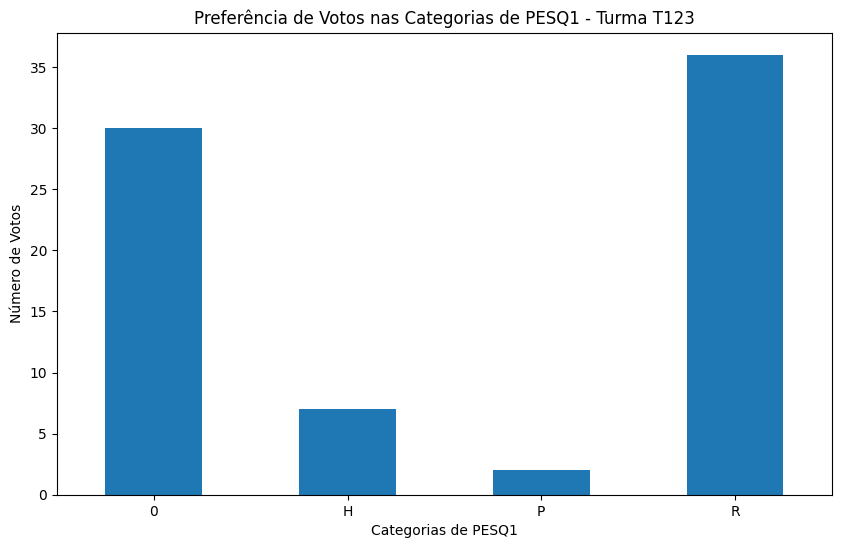

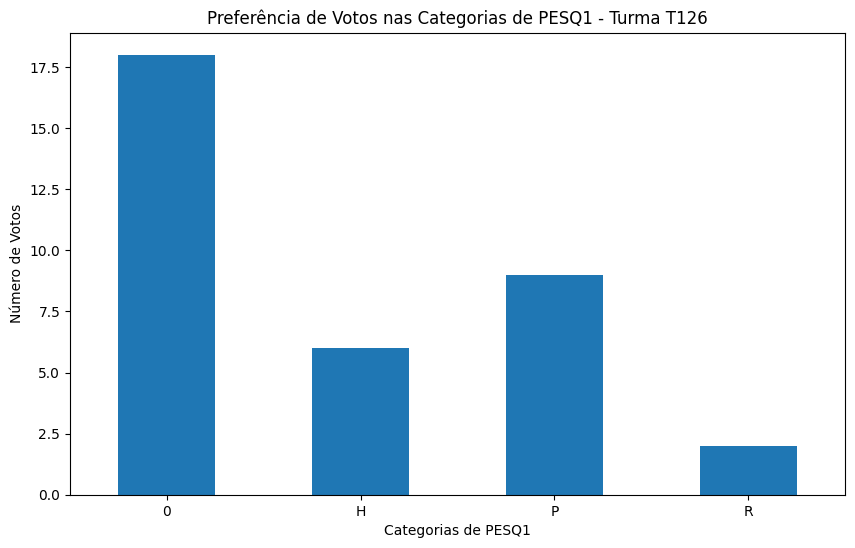

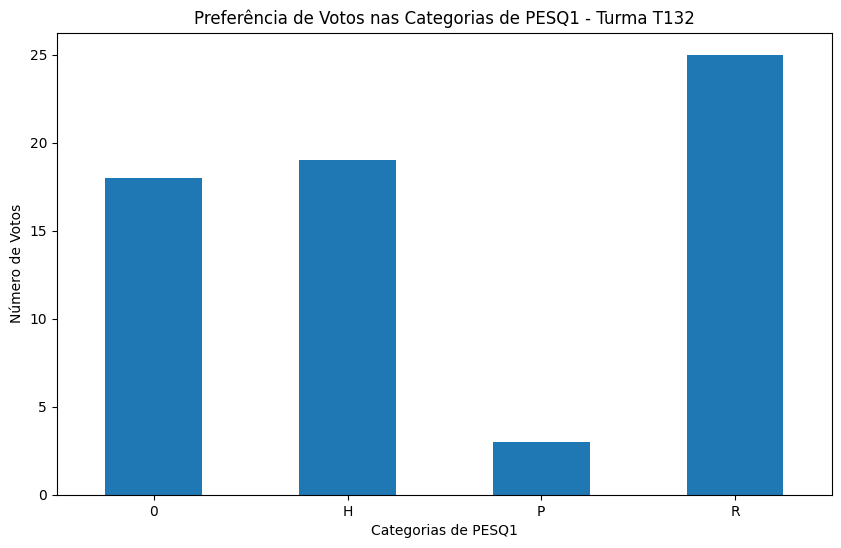

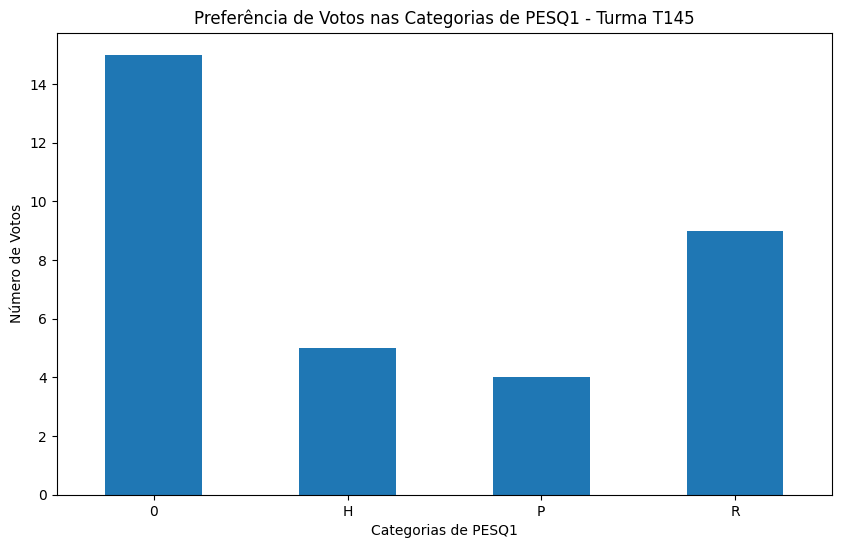

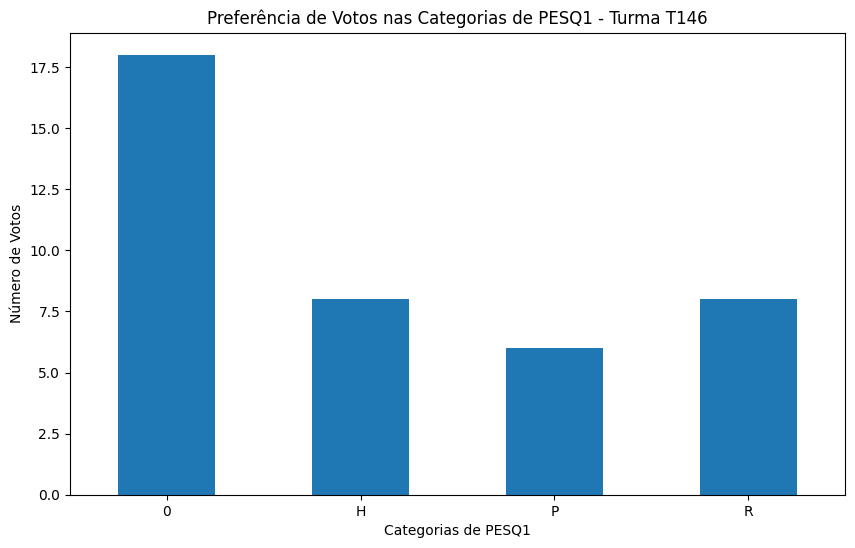

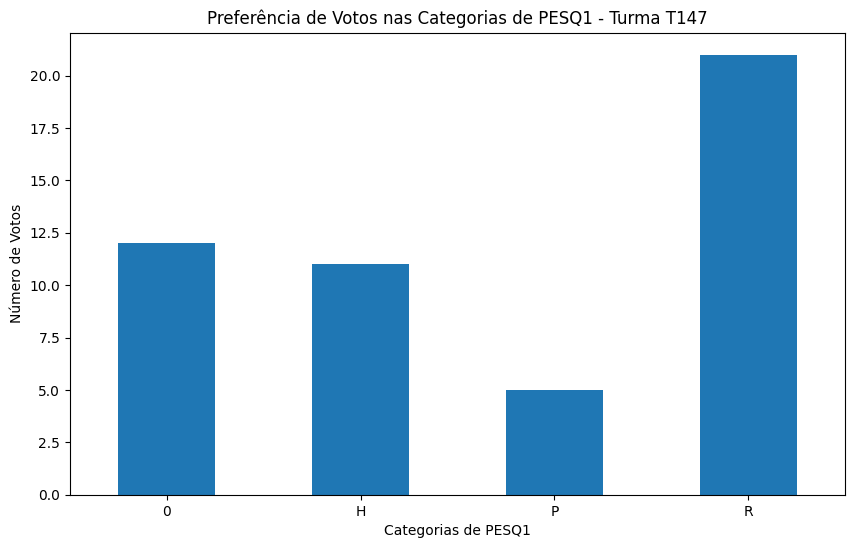

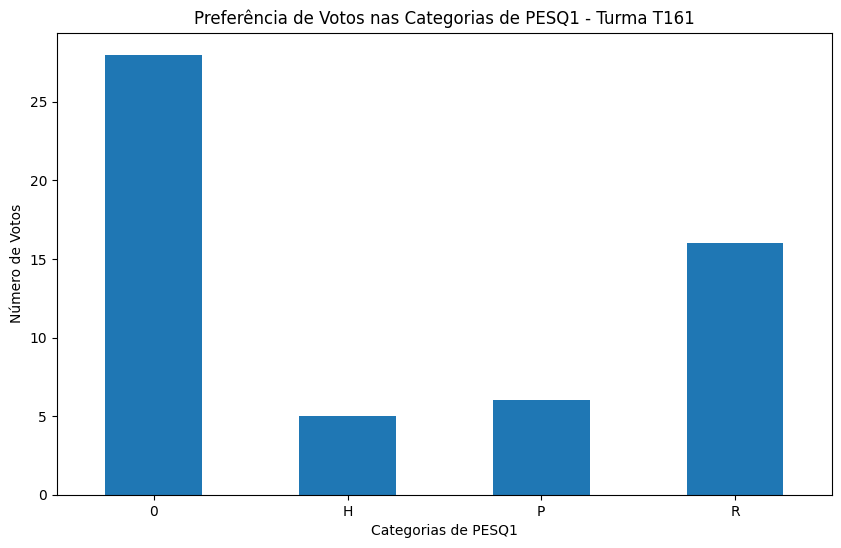

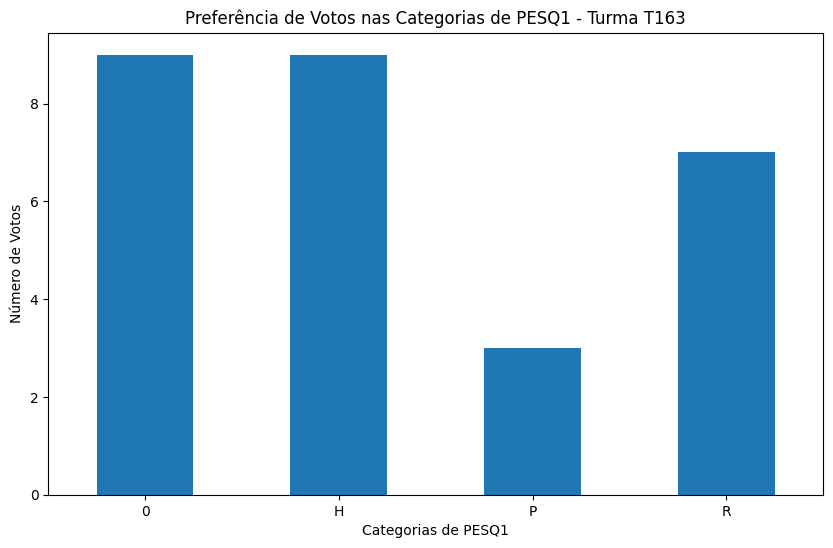

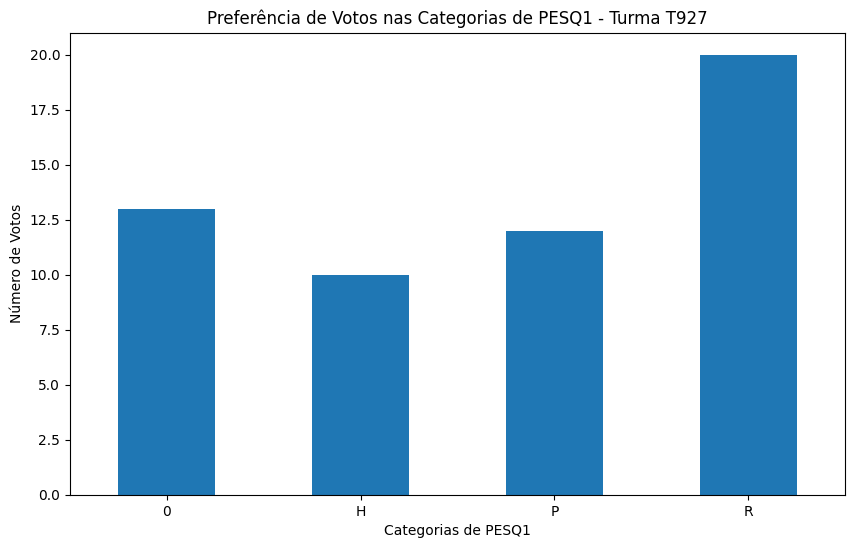

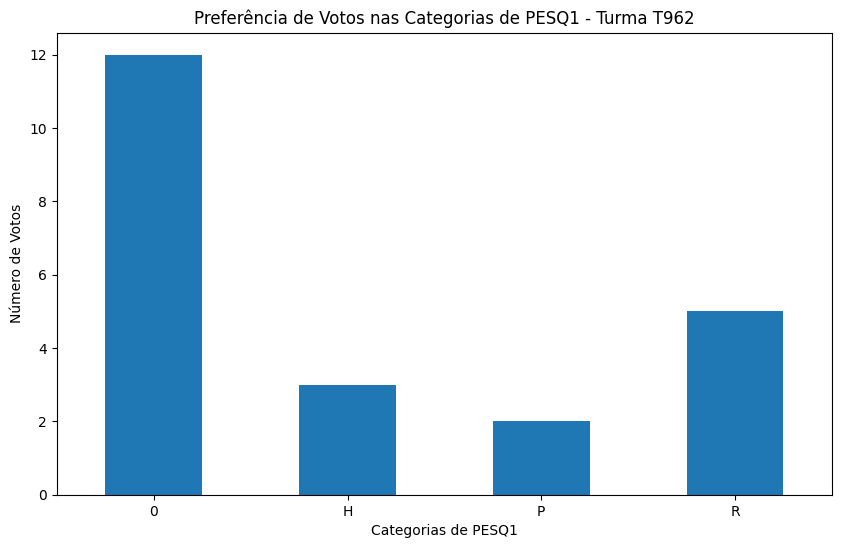

Although common responses exist, the contingency table between Turma T123 and Turma T126 is empty.

Although common responses exist, the contingency table between Turma T123 and Turma T132 is empty.

Although common responses exist, the contingency table between Turma T123 and Turma T145 is empty.

Although common responses exist, the contingency table between Turma T123 and Turma T146 is empty.

Although common responses exist, the contingency table between Turma T123 and Turma T147 is empty.

Although common responses exist, the contingency table between Turma T123 and Turma T161 is empty.

Although common responses exist, the contingency table between Turma T123 and Turma T163 is empty.

Although common responses exist, the contingency table between Turma T123 and Turma T927 is empty.

Although common responses exist, the contingency table between Turma T123 and Turma T962 is empty.

Although common responses exist, the contingency table between Turma T126 and Turma T132 is empty.



In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupa os dados por 'TURMA' e 'PESQ1' e conta as ocorrências
contagem_votos_por_turma = dados.groupby(['TURMA', 'PESQ1']).size().unstack(fill_value=0)

# Plota gráficos de barras para cada turma
for turma in contagem_votos_por_turma.index:
    plt.figure(figsize=(10, 6))
    contagem_votos_por_turma.loc[turma].plot(kind='bar')
    plt.title(f'Preferência de Votos nas Categorias de PESQ1 - Turma {turma}')
    plt.xlabel('Categorias de PESQ1')
    plt.ylabel('Número de Votos')
    plt.xticks(rotation=0)
    plt.show()

# Realiza testes estatísticos para comparar as preferências entre as turmas
# (Exemplo: teste qui-quadrado de independência)
for i in range(len(contagem_votos_por_turma.index)):
    for j in range(i + 1, len(contagem_votos_por_turma.index)):
        turma1 = contagem_votos_por_turma.index[i]
        turma2 = contagem_votos_por_turma.index[j]
        # Filter data for the two turmas being compared
        dados_turma1 = dados[dados['TURMA'] == turma1]['PESQ1']
        dados_turma2 = dados[dados['TURMA'] == turma2]['PESQ1']
        # Find common responses to 'PESQ1'
        common_responses = set(dados_turma1).intersection(dados_turma2)
        # Create contingency table only if common responses exist
        if common_responses:
            contingencia = pd.crosstab(dados_turma1.loc[dados_turma1.isin(common_responses)],
                                      dados_turma2.loc[dados_turma2.isin(common_responses)])
            # Perform chi-squared test only if contingency table has data
            if contingencia.size > 0:
                chi2, p, dof, expected = chi2_contingency(contingencia)
                print(f"Comparando Turma {turma1} e Turma {turma2}:")
                print(f"Valor do qui-quadrado: {chi2}")
                print(f"Valor-p: {p}")
                if p < 0.05:
                    print("Há evidências estatísticas para sugerir que existe uma diferença significativa nas preferências entre as turmas.")
                else:
                    print("Não há evidências estatísticas suficientes para sugerir uma diferença significativa nas preferências entre as turmas.")
                print("\n")
            else:
                print(f"Although common responses exist, the contingency table between Turma {turma1} and Turma {turma2} is empty.\n")
        else:
            print(f"No common responses to 'PESQ1' found between Turma {turma1} and Turma {turma2}.\n")

# Agrupa os dados por 'DISCIPLINA' e 'PESQ1' e conta as ocorrências (se aplicável)
# ...

# Realiza análises e testes estatísticos semelhantes para outros grupos de alunos (se aplicável)
# ...

PESQ1        0  H   P   R
TURMA SEXO               
T126  1     18  4   7   2
      2      0  2   2   0
T927  1     12  6  10  16
      2      1  4   2   4


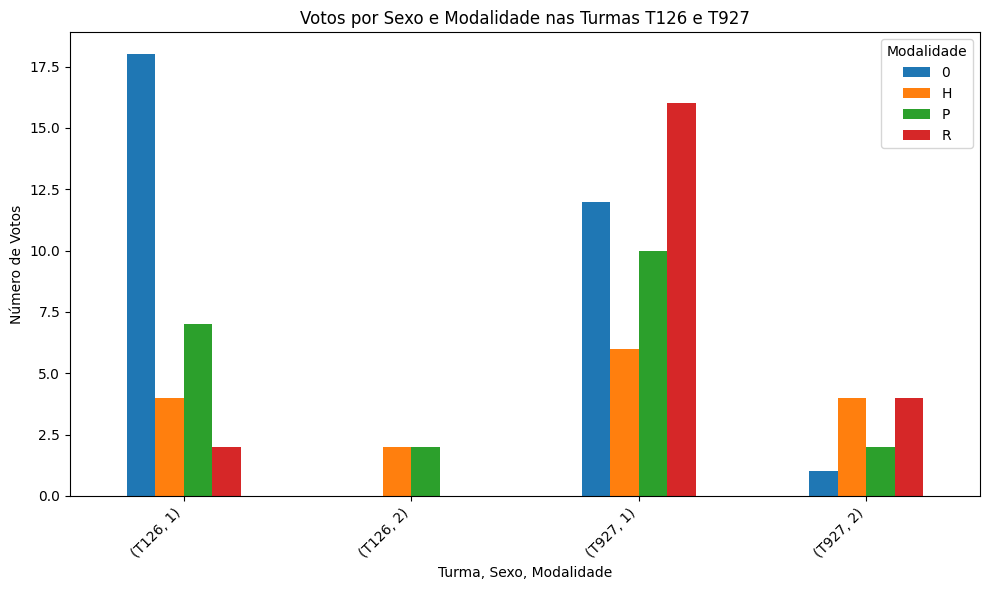

In [23]:
# prompt: Votos separados por sexo e modalidade nas turmas t126 e t927

import matplotlib.pyplot as plt
# Filtra os dados para as turmas T126 e T927
dados_t126_t927 = dados[dados['TURMA'].isin(['T126', 'T927'])]

# Agrupa os dados por 'TURMA', 'SEXO' e 'PESQ1' e conta as ocorrências
contagem_votos_por_turma_sexo = dados_t126_t927.groupby(['TURMA', 'SEXO', 'PESQ1']).size().unstack(fill_value=0)

# Imprime os resultados
print(contagem_votos_por_turma_sexo)

# Plota gráficos de barras para visualizar os resultados
contagem_votos_por_turma_sexo.plot(kind='bar', figsize=(10, 6))
plt.title('Votos por Sexo e Modalidade nas Turmas T126 e T927')
plt.xlabel('Turma, Sexo, Modalidade')
plt.ylabel('Número de Votos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Modalidade')
plt.tight_layout()
plt.show()


In [24]:
# prompt: total de votos por sexo nas turmas t126 e t927

# Filtra os dados para as turmas T126 e T927
dados_t126_t927 = dados[dados['TURMA'].isin(['T126', 'T927'])]

# Agrupa os dados por 'TURMA' e 'SEXO' e conta as ocorrências
total_votos_por_turma_sexo = dados_t126_t927.groupby(['TURMA', 'SEXO']).size()

# Imprime os resultados
print(total_votos_por_turma_sexo)


TURMA  SEXO
T126   1       31
       2        4
T927   1       44
       2       11
dtype: int64
